<a href="https://colab.research.google.com/github/joaovitor2410/Python/blob/main/AulasDadosImers%C3%A3oAtt3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**PRIMEIRA AULA: Analise de Dados com Pandas**

In [2]:
# @title
#importando a biblioteca pandas
import pandas as pd

In [3]:
# @title
#atribuindo uma base de dados a variavel df(dataframe)
df = pd.read_csv("https://raw.githubusercontent.com/guilhermeonrails/data-jobs/refs/heads/main/salaries.csv")

In [4]:
# @title
#ler a base de dados, se o parenteses estiver sem nada, aparecera as 5 primeiras, posso definir quantas linhas quero
df.head(10)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025.0,SE,FT,Solutions Engineer,214000,USD,214000,US,100,US,M
1,2025.0,SE,FT,Solutions Engineer,136000,USD,136000,US,100,US,M
2,2025.0,MI,FT,Data Engineer,158800,USD,158800,AU,0,AU,M
3,2025.0,MI,FT,Data Engineer,139200,USD,139200,AU,0,AU,M
4,2025.0,EN,FT,Data Engineer,90000,USD,90000,US,0,US,M
5,2025.0,EN,FT,Data Engineer,80000,USD,80000,US,0,US,M
6,2025.0,SE,FT,Data Scientist,185000,USD,185000,US,0,US,M
7,2025.0,SE,FT,Data Scientist,148000,USD,148000,US,0,US,M
8,2025.0,MI,FT,Data Scientist,135000,USD,135000,CA,0,CA,M
9,2025.0,MI,FT,Data Scientist,108000,USD,108000,CA,0,CA,M


In [5]:
# @title
#informaçoes sobre o arquivo
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133349 entries, 0 to 133348
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   work_year           133339 non-null  float64
 1   experience_level    133349 non-null  object 
 2   employment_type     133349 non-null  object 
 3   job_title           133349 non-null  object 
 4   salary              133349 non-null  int64  
 5   salary_currency     133349 non-null  object 
 6   salary_in_usd       133349 non-null  int64  
 7   employee_residence  133349 non-null  object 
 8   remote_ratio        133349 non-null  int64  
 9   company_location    133349 non-null  object 
 10  company_size        133349 non-null  object 
dtypes: float64(1), int64(3), object(7)
memory usage: 11.2+ MB


In [6]:
# @title
#uma descrição sobre o arquivo
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,133339.000000,1.333490e+05,133349.000000,133349.000000
mean,2024.358770,1.632833e+05,157617.272098,20.905669
std,0.680627,2.173860e+05,74288.363097,40.590044
min,2020.000000,1.400000e+04,15000.000000,0.000000
25%,2024.000000,1.060200e+05,106000.000000,0.000000
50%,2024.000000,1.470000e+05,146206.000000,0.000000
75%,2025.000000,1.990000e+05,198000.000000,0.000000
max,2025.000000,3.040000e+07,800000.000000,100.000000


In [7]:
# @title
#mostra dimensão da base, primeiro as linhas, depois as colunas
df.shape

(133349, 11)

In [8]:
# @title
#organizando em um print as informações de linhas e colunas
linhas, colunas = df.shape[0], df.shape[1]

print(f'A quantidade de linhas é de {linhas} e a de colunas é de {colunas}')

A quantidade de linhas é de 133349 e a de colunas é de 11


In [9]:
# @title
#listar o nome das colunas
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [10]:
# @title
# Renomear as colunas do DataFrame
df.columns = ['ano', 'experiencia', 'contrato', 'cargo', 'salario', 'moeda', 'usd',
              'residencia', 'remoto', 'empresa', 'tamanho_empresa']

# Exibir os nomes das colunas renomeadas
print(df.columns)

Index(['ano', 'experiencia', 'contrato', 'cargo', 'salario', 'moeda', 'usd',
       'residencia', 'remoto', 'empresa', 'tamanho_empresa'],
      dtype='object')


In [11]:
# @title
#analisando a quantidade em uma coluna
df['experiencia'].value_counts()

,count
experiencia,
SE,77241
MI,40465
EN,12443
EX,3200


In [12]:
# @title
df['cargo'].value_counts()

,count
cargo,
Data Scientist,17314
Software Engineer,15007
Data Engineer,14868
Data Analyst,12381
Engineer,9456
...,...
Quantitative Research Analyst,1
Data Science Tech Lead,1
Staff Machine Learning Engineer,1


In [13]:
# @title
df["contrato"].value_counts()

,count
contrato,
FT,132563
CT,394
PT,376
FL,16


In [14]:
# @title
df["remoto"].value_counts()

,count
remoto,
0,105312
100,27718
50,319


In [15]:
# @title
df["tamanho_empresa"].value_counts()

,count
tamanho_empresa,
M,129561
L,3574
S,214


In [16]:
# @title
#tradução das categorias na coluna 'contrato' e análise da quantidade
df['contrato'] = df['contrato'].replace({
    'FT': 'Tempo Integral',
    'CT': 'Contrato',
    'PT': 'Tempo Parcial',
    'FL': 'Freelancer'
})

df["contrato"].value_counts()

,count
contrato,
Tempo Integral,132563
Contrato,394
Tempo Parcial,376
Freelancer,16


In [17]:
# @title
# Traduzindo as categorias na coluna 'tamanho_empresa' e analisando a quantidade
df['tamanho_empresa'] = df['tamanho_empresa'].replace({
    'M': 'Médio',
    'L': 'Grande',
    'S': 'Pequeno'
})

df['tamanho_empresa'].value_counts()

,count
tamanho_empresa,
Médio,129561
Grande,3574
Pequeno,214


In [18]:
# @title
# Traduzindo as categorias na coluna 'remoto' e analisando a quantidade
df['remoto'] = df['remoto'].replace({
    0: 'Presencial',
    50: 'Híbrido',
    100: 'Remoto'
})

df['remoto'].value_counts()

,count
remoto,
Presencial,105312
Remoto,27718
Híbrido,319


In [19]:
# @title
df.head()

,ano,experiencia,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025.0,SE,Tempo Integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Médio
1,2025.0,SE,Tempo Integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Médio
2,2025.0,MI,Tempo Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Médio
3,2025.0,MI,Tempo Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Médio
4,2025.0,EN,Tempo Integral,Data Engineer,90000,USD,90000,US,Presencial,US,Médio


In [20]:
# @title
df.describe(include='object')

,experiencia,contrato,cargo,moeda,residencia,remoto,empresa,tamanho_empresa
count,133349,133349,133349,133349,133349,133349,133349,133349
unique,4,4,390,26,102,3,95,3
top,SE,Tempo Integral,Data Scientist,USD,US,Presencial,US,Médio
freq,77241,132563,17314,126140,119579,105312,119641,129561


In [21]:
# @title
df['salario'].value_counts()

,count
salario,
160000,2466
110000,2262
150000,2189
180000,1840
100000,1839
...,...
165220,1
208775,1
1450000,1


Exercicio Da Aula

In [22]:
# @title
df.describe()

,ano,salario,usd
count,133339.000000,1.333490e+05,133349.000000
mean,2024.358770,1.632833e+05,157617.272098
std,0.680627,2.173860e+05,74288.363097
min,2020.000000,1.400000e+04,15000.000000
25%,2024.000000,1.060200e+05,106000.000000
50%,2024.000000,1.470000e+05,146206.000000
75%,2025.000000,1.990000e+05,198000.000000
max,2025.000000,3.040000e+07,800000.000000


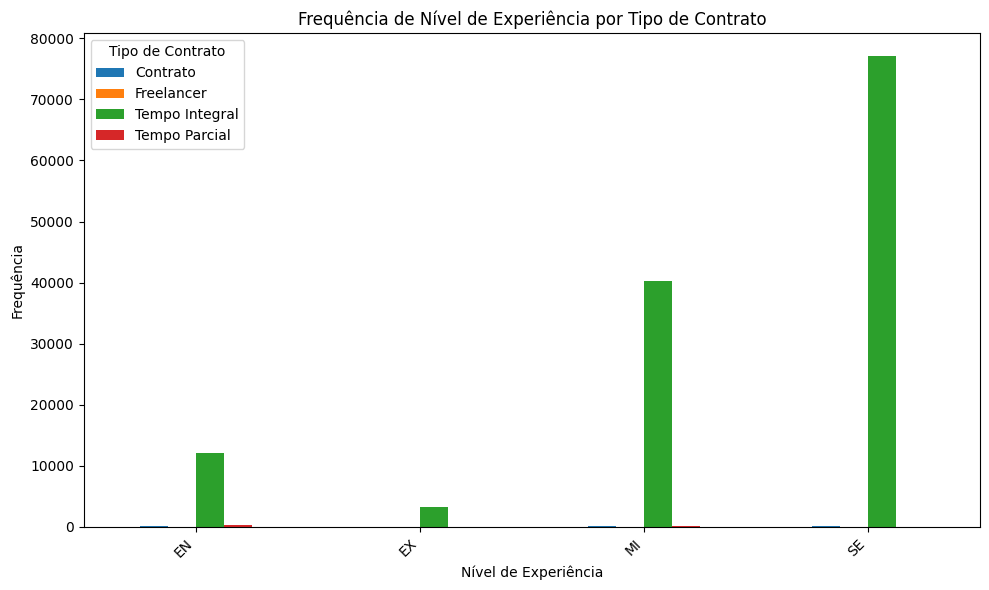

In [23]:
# @title
import matplotlib.pyplot as plt
import seaborn as sns

# Calcular a frequência combinada de 'experiencia' e 'contrato'
experiencia_contrato_counts = df.groupby(['experiencia', 'contrato']).size().unstack(fill_value=0)

# Visualizar os dados em um gráfico de barras
fig, ax = plt.subplots(figsize=(10, 6))
experiencia_contrato_counts.plot(kind='bar', ax=ax)

plt.title('Frequência de Nível de Experiência por Tipo de Contrato')
plt.xlabel('Nível de Experiência')
plt.ylabel('Frequência')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Tipo de Contrato')
plt.tight_layout()
plt.show()

**SEGUNDA AULA: Preparação e Limpeza de Dados**

In [24]:
#Verifica campos não preenchidos
df.isnull()

,ano,experiencia,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
133344,False,False,False,False,False,False,False,False,False,False,False
133345,False,False,False,False,False,False,False,False,False,False,False
133346,False,False,False,False,False,False,False,False,False,False,False
133347,False,False,False,False,False,False,False,False,False,False,False


In [25]:
df.head()

,ano,experiencia,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025.0,SE,Tempo Integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Médio
1,2025.0,SE,Tempo Integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Médio
2,2025.0,MI,Tempo Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Médio
3,2025.0,MI,Tempo Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Médio
4,2025.0,EN,Tempo Integral,Data Engineer,90000,USD,90000,US,Presencial,US,Médio


In [26]:
#realiza a soma dos campos não preenchidos
df.isnull().sum()

,0
ano,10
experiencia,0
contrato,0
cargo,0
salario,0
moeda,0
usd,0
residencia,0
remoto,0
empresa,0


In [27]:
#Verifica os anos inseridos
df["ano"].unique()

array([2025.,   nan, 2024., 2022., 2023., 2020., 2021.])

In [28]:
#filtrando as linhas que estão nulas
df[df.isnull().any(axis=1)]

,ano,experiencia,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
5588,NaN,SE,Tempo Integral,Product Manager,184500,USD,184500,US,Presencial,US,Médio
59692,NaN,MI,Tempo Integral,Engineer,110000,USD,110000,DE,Presencial,DE,Médio
59710,NaN,EN,Tempo Integral,Data Scientist,208800,USD,208800,US,Presencial,US,Médio
59759,NaN,SE,Tempo Integral,Software Engineer,135000,USD,135000,US,Presencial,US,Médio
59789,NaN,SE,Tempo Integral,Engineer,112000,USD,112000,US,Presencial,US,Médio
131000,NaN,SE,Tempo Integral,Machine Learning Engineer,163800,USD,163800,US,Presencial,US,Médio
131006,NaN,SE,Tempo Integral,Data Analytics Manager,204500,USD,204500,US,Presencial,US,Médio
133054,NaN,EN,Tempo Integral,Data Scientist,40000,USD,40000,JP,Remoto,MY,Grande
133281,NaN,MI,Tempo Integral,Machine Learning Engineer,180000,PLN,46597,PL,Remoto,PL,Grande
133317,NaN,MI,Tempo Integral,Data Scientist,130000,USD,130000,US,Híbrido,US,Grande


In [29]:
#importanto a biblioteca Numpy
import numpy as np

#Criando um DataFrame Exemplo para trabalhar com os salarios
df_salarios = pd.DataFrame({
    "Nome": ["Ana",'Bruno', 'Carlos', 'Daniele', 'Val'],
    'Salario': [4000, np.nan, 5000, np.nan, 100000]
})

#Fazendo a media para preencher os valores nulos
df_salarios['salario_media'] = df_salarios['Salario'].fillna(df_salarios['Salario'].mean().round(2))
df_salarios

,Nome,Salario,salario_media
0,Ana,4000.0,4000.00
1,Bruno,NaN,36333.33
2,Carlos,5000.0,5000.00
3,Daniele,NaN,36333.33
4,Val,100000.0,100000.00


In [30]:
#Fazendo a mediana para preencher os valores nulos
df_salarios['salario_mediana'] = df_salarios['Salario'].fillna(df_salarios['Salario'].median())
df_salarios

,Nome,Salario,salario_media,salario_mediana
0,Ana,4000.0,4000.00,4000.0
1,Bruno,NaN,36333.33,5000.0
2,Carlos,5000.0,5000.00,5000.0
3,Daniele,NaN,36333.33,5000.0
4,Val,100000.0,100000.00,100000.0


In [31]:
#Criando um dataframe exemplo para temperatura
df_temperaturas = pd.DataFrame({
    'Dia': ['Segunda', 'Terça', 'Quarta', 'Quinta', 'Sexta'],
    'Temperatura' : [30, np.nan, np.nan, 28, 27]
})

#preenchendo os nulos de acordo com o anterior
df_temperaturas['preenchido_ffill'] = df_temperaturas['Temperatura'].ffill()
df_temperaturas

,Dia,Temperatura,preenchido_ffill
0,Segunda,30.0,30.0
1,Terça,NaN,30.0
2,Quarta,NaN,30.0
3,Quinta,28.0,28.0
4,Sexta,27.0,27.0


In [32]:
#Criando um dataframe exemplo para temperatura
df_temperaturas = pd.DataFrame({
    'Dia': ['Segunda', 'Terça', 'Quarta', 'Quinta', 'Sexta'],
    'Temperatura' : [30, np.nan, np.nan, 28, 27]
})

#preenchendo os nulos de acordo com o posterior
df_temperaturas['preenchido_bfill'] = df_temperaturas['Temperatura'].bfill()
df_temperaturas

,Dia,Temperatura,preenchido_bfill
0,Segunda,30.0,30.0
1,Terça,NaN,28.0
2,Quarta,NaN,28.0
3,Quinta,28.0,28.0
4,Sexta,27.0,27.0


In [33]:
#Criando um DataFrame Exemplo para cidades
df_cidades = pd.DataFrame({
    "Nome": ["Ana",'Bruno', 'Carlos', 'Daniele', 'Val'],
    'Cidade': ['São Paulo', np.nan, 'Curitiba', np.nan, "Belém"]
})

df_cidades['cidade_preenchida'] = df_cidades['Cidade'].fillna('Não Informado')
df_cidades

,Nome,Cidade,cidade_preenchida
0,Ana,São Paulo,São Paulo
1,Bruno,NaN,Não Informado
2,Carlos,Curitiba,Curitiba
3,Daniele,NaN,Não Informado
4,Val,Belém,Belém


In [34]:
#Criando um Data Frame para limpar os dados vazios sem corromper o original
df_limpo = df.dropna()
df_limpo.isnull().sum()

,0
ano,0
experiencia,0
contrato,0
cargo,0
salario,0
moeda,0
usd,0
residencia,0
remoto,0
empresa,0


In [35]:
df_limpo.head()

,ano,experiencia,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025.0,SE,Tempo Integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Médio
1,2025.0,SE,Tempo Integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Médio
2,2025.0,MI,Tempo Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Médio
3,2025.0,MI,Tempo Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Médio
4,2025.0,EN,Tempo Integral,Data Engineer,90000,USD,90000,US,Presencial,US,Médio


In [36]:
df_limpo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 133339 entries, 0 to 133348
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   ano              133339 non-null  float64
 1   experiencia      133339 non-null  object 
 2   contrato         133339 non-null  object 
 3   cargo            133339 non-null  object 
 4   salario          133339 non-null  int64  
 5   moeda            133339 non-null  object 
 6   usd              133339 non-null  int64  
 7   residencia       133339 non-null  object 
 8   remoto           133339 non-null  object 
 9   empresa          133339 non-null  object 
 10  tamanho_empresa  133339 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 12.2+ MB


In [37]:
#trocar o tipo de variavel da coluna ano (float para int)
df_limpo = df_limpo.assign(ano = df_limpo['ano'].astype('int64'))

**TERCEIRA AULA: Visualização de Dados**

In [39]:
df_limpo.head()

,ano,experiencia,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025,SE,Tempo Integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Médio
1,2025,SE,Tempo Integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Médio
2,2025,MI,Tempo Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Médio
3,2025,MI,Tempo Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Médio
4,2025,EN,Tempo Integral,Data Engineer,90000,USD,90000,US,Presencial,US,Médio


<Axes: title={'center': 'Senioridade'}, xlabel='experiencia'>

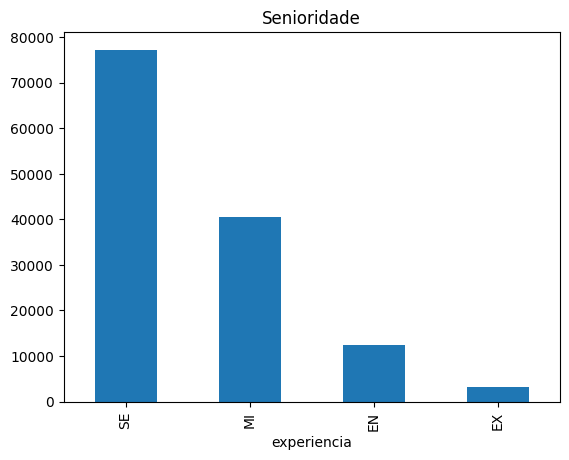

In [42]:
#vai me dar um grafico com os valores da coluna experiencia
df_limpo['experiencia'].value_counts().plot(kind = 'bar', title = 'Senioridade')

In [43]:
#importar a biblioteca Seaborn
import seaborn as sns

<Axes: xlabel='experiencia', ylabel='usd'>

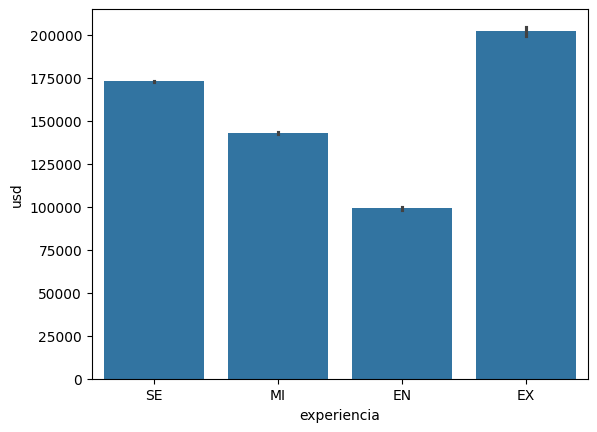

In [44]:
#criando um grafico utilizando as informaçoes da experiencia e dos salarios em dolár (anual)
sns.barplot(data = df_limpo, x = 'experiencia', y = 'usd')

In [ ]:
#importando a biblioteca mathplotlib
import matplotlib.pyplot as plt

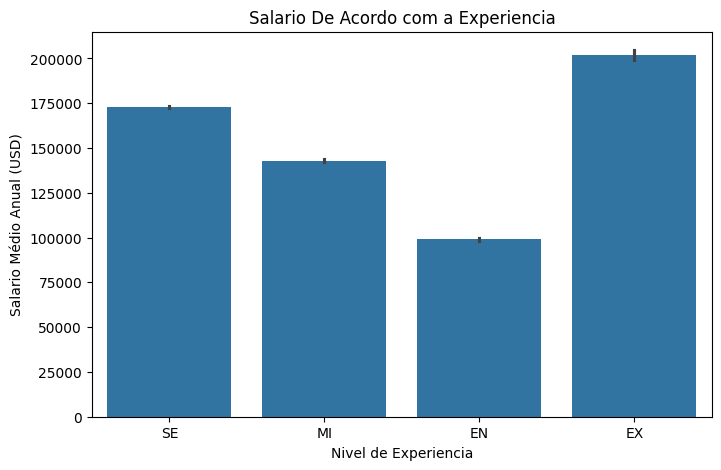

In [47]:
#adicionando visualizações adicionais no grafico
plt.figure(figsize = (8,5))
sns.barplot(data = df_limpo, x = 'experiencia', y = 'usd')
plt.title('Salario De Acordo com a Experiencia')
plt.xlabel('Nivel de Experiencia')
plt.ylabel('Salario Médio Anual (USD)')
plt.show()

In [50]:
#organizando os dados do grafico
df_limpo.groupby('experiencia')['usd'].mean().sort_values(ascending = False)

,usd
experiencia,
EX,202027.667813
SE,172850.838301
MI,143044.845979
EN,99034.963267


In [52]:
#Criando uma variavel para armazenar o codigo
ordem = df_limpo.groupby('experiencia')['usd'].mean().sort_values(ascending = False).index
ordem

Index(['EX', 'SE', 'MI', 'EN'], dtype='object', name='experiencia')

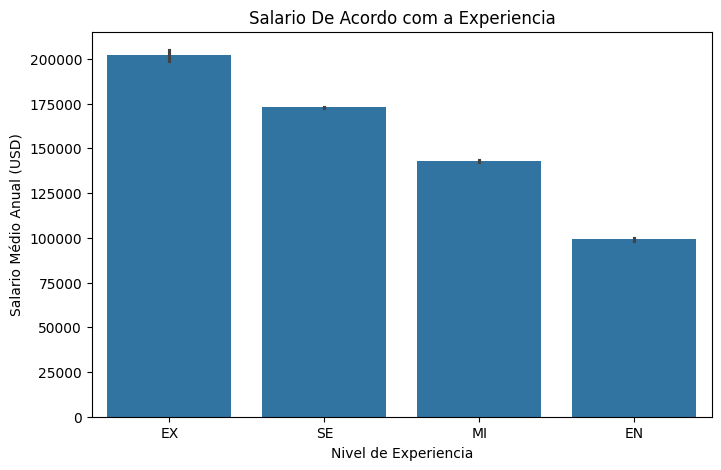

In [53]:
#aplicando a organização no grafico
plt.figure(figsize = (8,5))
sns.barplot(data = df_limpo, x = 'experiencia', y = 'usd', order = ordem)
plt.title('Salario De Acordo com a Experiencia')
plt.xlabel('Nivel de Experiencia')
plt.ylabel('Salario Médio Anual (USD)')
plt.show()

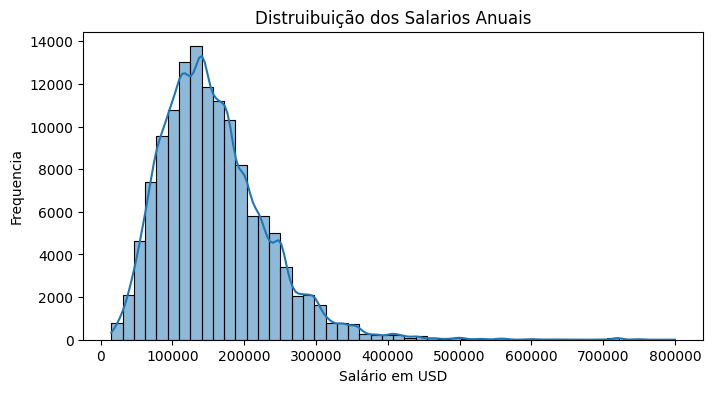

In [56]:
#Criando um histograma
plt.figure(figsize = (8,4))
sns.histplot(df_limpo['usd'], bins = 50, kde = True)
plt.title('Distruibuição dos Salarios Anuais')
plt.xlabel('Salário em USD')
plt.ylabel('Frequencia')
plt.show()

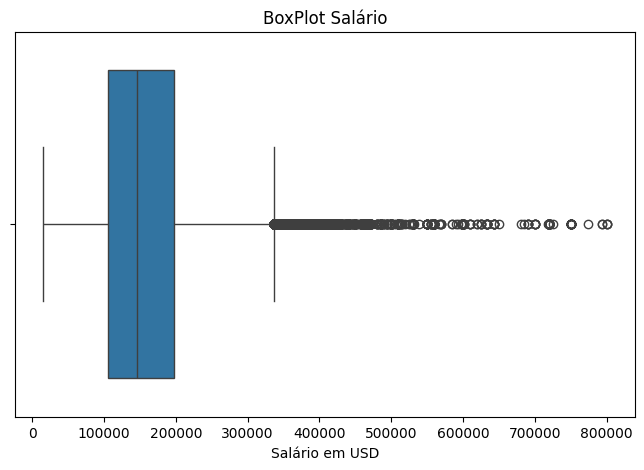

In [57]:
#Criando um grafico em BoxPlot
plt.figure(figsize = (8,5))
sns.boxplot(x = df_limpo['usd'])
plt.title('BoxPlot Salário')
plt.xlabel('Salário em USD')
plt.show()

In [61]:
# Traduzindo as categorias na coluna 'experiencia' e analisando a quantidade
df_limpo['experiencia'] = df_limpo['experiencia'].replace({
    'SE': 'Senior',
    'MI': 'Pleno',
    'EN': 'Junior',
    'EX': 'Executivo'
})

df_limpo['experiencia'].value_counts()

,count
experiencia,
Senior,77236
Pleno,40462
Junior,12441
Executivo,3200


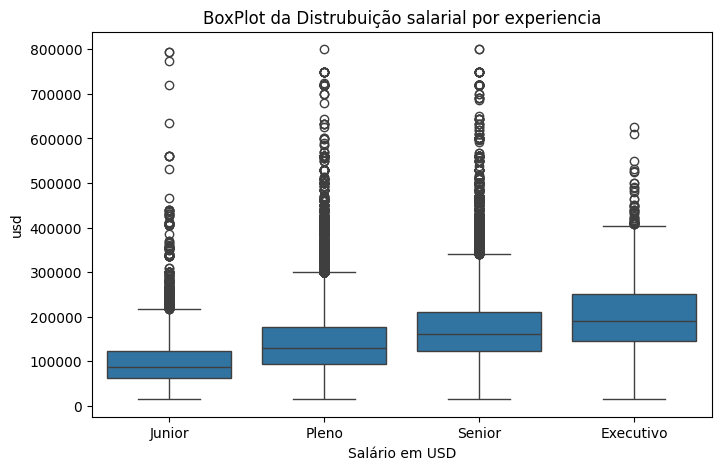

In [63]:
#Criando um BoxPlot para cada nivel de experiencia
ordem_experiencia = ['Junior', 'Pleno', 'Senior', 'Executivo']
plt.figure(figsize = (8,5))
sns.boxplot(x = 'experiencia' , y = 'usd', data = df_limpo, order = ordem_experiencia)
plt.title('BoxPlot da Distrubuição salarial por experiencia')
plt.xlabel('Salário em USD')
plt.show()

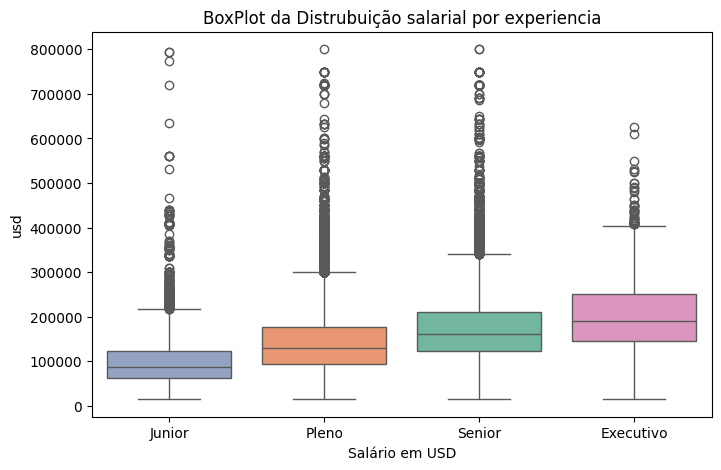

In [65]:
#adicionando cores ao grafico
ordem_experiencia = ['Junior', 'Pleno', 'Senior', 'Executivo']
plt.figure(figsize = (8,5))
sns.boxplot(x = 'experiencia' , y = 'usd', data = df_limpo, order = ordem_experiencia, palette = 'Set2', hue = 'experiencia')
plt.title('BoxPlot da Distrubuição salarial por experiencia')
plt.xlabel('Salário em USD')
plt.show()

In [67]:
#importando uma biblioteca interativa para graficos
import plotly.express as px

In [68]:
#criando um grafico em barras interativo
df_salario_medio_por_experiencia = df_limpo.groupby('experiencia')['usd'].mean().reset_index()

fig = px.bar(df_salario_medio_por_experiencia, x='experiencia', y='usd', title='Salário Médio por Nível de Experiência (USD)',
             labels={'experiencia': 'Nível de Experiência', 'usd': 'Salário Médio Anual (USD)'},
             color='experiencia', category_orders={'experiencia': ordem_experiencia})
fig.show()

In [71]:
#criando um grafico em pizza
remoto_contagem = df_limpo['remoto'].value_counts().reset_index()
remoto_contagem.columns = ['tipo_trabalho', 'quantidade']

fig = px.pie(remoto_contagem,
             names = 'tipo_trabalho',
             values = 'quantidade',
             title = 'Proporção dos tipos de trabalho')
fig.show()


In [73]:
#fazendo o grafico em rosca
remoto_contagem = df_limpo['remoto'].value_counts().reset_index()
remoto_contagem.columns = ['tipo_trabalho', 'quantidade']

fig = px.pie(remoto_contagem,
             names = 'tipo_trabalho',
             values = 'quantidade',
             title = 'Proporção dos tipos de trabalho',
             hole = 0.5)
fig.show()

In [74]:
#exibindo a porcentagem e o label
remoto_contagem = df_limpo['remoto'].value_counts().reset_index()
remoto_contagem.columns = ['tipo_trabalho', 'quantidade']

fig = px.pie(remoto_contagem,
             names = 'tipo_trabalho',
             values = 'quantidade',
             title = 'Proporção dos tipos de trabalho',
             hole = 0.5)
fig.update_traces(textinfo = 'percent + label')
fig.show()

ATIVADE: FAZER UM GRAFICO PEGANDO A PROFISSÃO DE DATA SCIENTIST E GERAR UMA VISUALIZAÇÃO DE SALARIO MEDIO POR PAÍS